In [1]:
!pip install librosa

In [2]:
# Importing the necessary library
import librosa
import pandas as pd
import os
import numpy as np
import re
from enum import Enum
import IPython.display as ipd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as sk
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [3]:
# function to extract the relevant features of an audio file
def extract_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file) #The sampling rate --- typically fs in the digital signal processing literature, or sr in librosa. 
                                    # The sampling rate (sr) is defined as 1/ts, where ts is the amount of time (in seconds) between successive samples.
        
    print("The sample rate of the {} is:- {}".format(audio_file,sr))
        
# Extract features using librosa
    # Compute a chromagram from a waveform or power spectrogram and return as numpy array.    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) 

    # Compute root-mean-square (RMS) value from the audio samples y.
    rmse = librosa.feature.rms(y=y) 
    
    # The spectral centroid indicates at which frequency the energy of a spectrum is centered upon 
    # or in other words It indicates where the ” center of mass” for a sound is located.
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)  
    
    # The spectrum of a signal is the range of frequencies contained in the signal. 
    # The bandwidth is the difference between the lowest and highest frequency in the spectrum.
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    # spectral_rolloff measures the bandwidth of the audio signal by determining the frequency bin under which a given percentage of the total energy exists 
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    
    # The mel frequency cepstral coefficients (MFCCs) of an audio signal are a small set of features (usually about 10–20) which describe the overall shape of the spectral envelope.
    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    # compute the mean values for the extracted features and store is as a list
    features = [chroma_stft.mean(), rmse.mean(), spectral_centroid.mean(),
                spectral_bandwidth.mean(), spectral_rolloff.mean()] + mfccs.mean(axis=1).tolist()

    return features



In [4]:
# function to access the audio files stored locally and then extract the features of each audio file using the extract_features function
def process_audio_files(root_folder):
    features_list = []

    for folder_name in os.listdir(root_folder): # iterate through all the folders in the root folder
        folder_path = os.path.join(root_folder, folder_name) 
        # print(folder_path)
        if os.path.isdir(folder_path):
            print(folder_path)
            for file_name in os.listdir(folder_path): # iterate through all the contents/files in the folder
                if file_name.endswith(".wav"): # access all the audio files (.wav format) in each folder
                    audio_path = os.path.join(folder_path, file_name)
                    print("Audio Path:",audio_path)
                    features = extract_features(audio_path) # extract the features of the audio file
                    features_list.append(features + [folder_name]) 

    return audio_path, features_list



In [5]:
# Function to save the extracted features into csv file
def save_features_to_csv(features_list, csv_file):
    # define the column names
    column_names = ["chroma_stft", "rmse", "spectral_centroid",
                    "spectral_bandwidth", "spectral_rolloff"] + ["mfcc_{}".format(i) for i in range(1, 21)] + ["target"]
    
    df = pd.DataFrame(features_list, columns=column_names)
    df.to_csv(csv_file, index=False)



In [6]:
# define the root folder
root_folder = "C:\\Users\\AKHIL JX\\Downloads\\Music"

# define the csv file
csv_file = "dataset.csv"

audio_path, features_list = process_audio_files(root_folder)
save_features_to_csv(features_list, csv_file)


C:\Users\AKHIL JX\Downloads\Music\cat
Audio Path: C:\Users\AKHIL JX\Downloads\Music\cat\cat-fight.wav
The sample rate of the C:\Users\AKHIL JX\Downloads\Music\cat\cat-fight.wav is:- 22050
Audio Path: C:\Users\AKHIL JX\Downloads\Music\cat\cat-kitten1.wav
The sample rate of the C:\Users\AKHIL JX\Downloads\Music\cat\cat-kitten1.wav is:- 22050
Audio Path: C:\Users\AKHIL JX\Downloads\Music\cat\cat-kitten2.wav
The sample rate of the C:\Users\AKHIL JX\Downloads\Music\cat\cat-kitten2.wav is:- 22050
Audio Path: C:\Users\AKHIL JX\Downloads\Music\cat\cat-kitten3.wav
The sample rate of the C:\Users\AKHIL JX\Downloads\Music\cat\cat-kitten3.wav is:- 22050
Audio Path: C:\Users\AKHIL JX\Downloads\Music\cat\cat-lick.wav
The sample rate of the C:\Users\AKHIL JX\Downloads\Music\cat\cat-lick.wav is:- 22050
Audio Path: C:\Users\AKHIL JX\Downloads\Music\cat\cat-mad1.wav
The sample rate of the C:\Users\AKHIL JX\Downloads\Music\cat\cat-mad1.wav is:- 22050
Audio Path: C:\Users\AKHIL JX\Downloads\Music\cat\cat-

# Visualising the audio

In [7]:
# analysing the output of librosa.load(audio file)
y, sr = librosa.load(audio_path)
print("The {} is stored as:- {} format with a shape of: {}".format(audio_path,type(y),y.shape))
print("The format of the sampling rate is:- ",type(sr))

The C:\Users\AKHIL JX\Downloads\Music\duck\goose-2.wav is stored as:- <class 'numpy.ndarray'> format with a shape of: (104494,)
The format of the sampling rate is:-  <class 'int'>


In [8]:
# playing the audio file
ipd.Audio(audio_path)

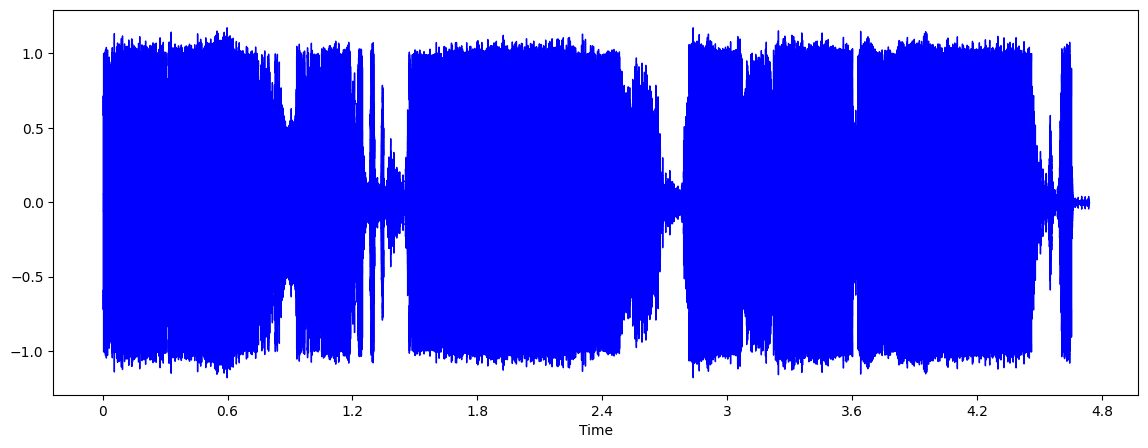

In [9]:
# displaying the audio file in the wave format.
y, sr = librosa.load(audio_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='blue')

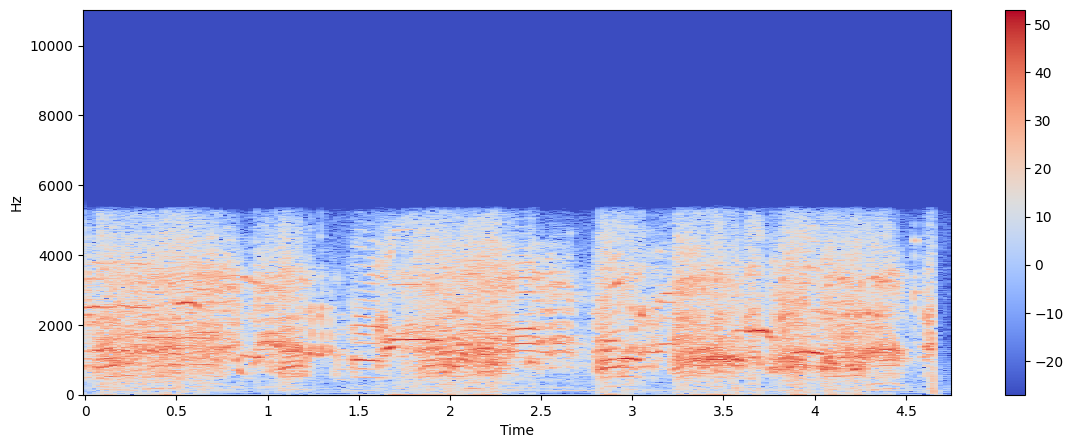

In [10]:
#display Spectrogram
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

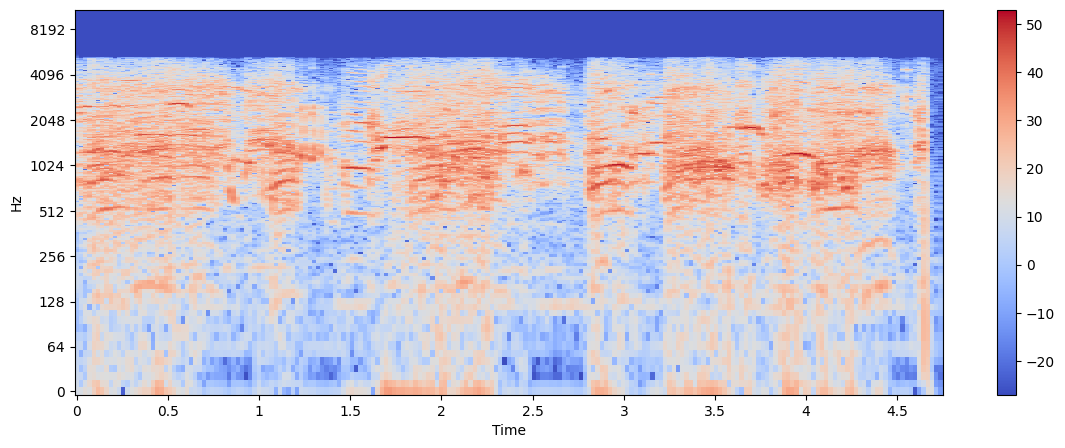

In [11]:
# plotting Spectrogram based on the log of frequencies
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

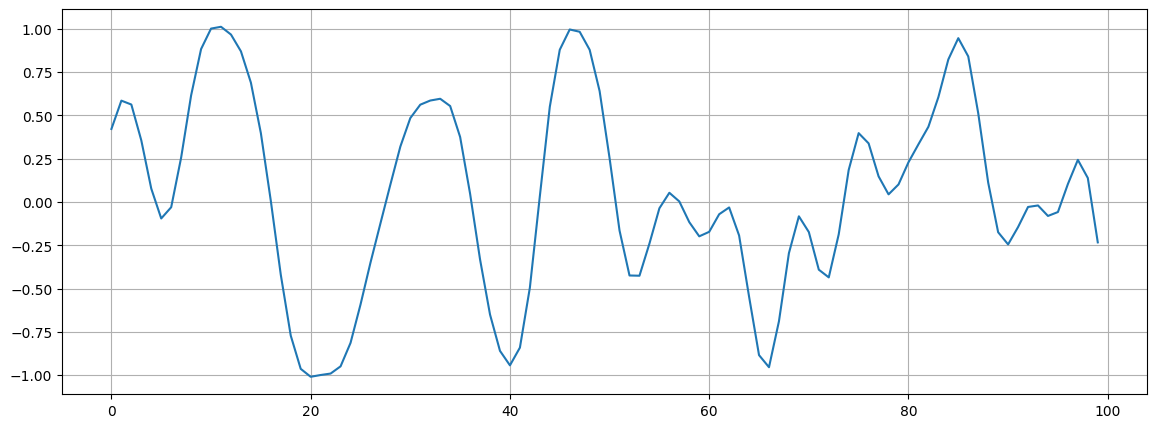

In [12]:
# Zooming in
# This code zooms in on a specific segment of an audio signal (defined by the indices n0 and n1) and plots the waveform of that segment, 
# providing a detailed view of the audio signal in that particular range. 
# This type of visualization is often useful in audio analysis to inspect specific portions of the signal for characteristics such as amplitude, frequency content, or other features.

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()


In [13]:
# In audio analysis, zero-crossings are often used as a feature to characterize the rate of change in the audio signal. 
# A high number of zero-crossings can indicate a signal with rapid changes in amplitude, which might be associated with percussive or high-frequency components.
# This information can be valuable for tasks such as audio classification or segmentation.

zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

13


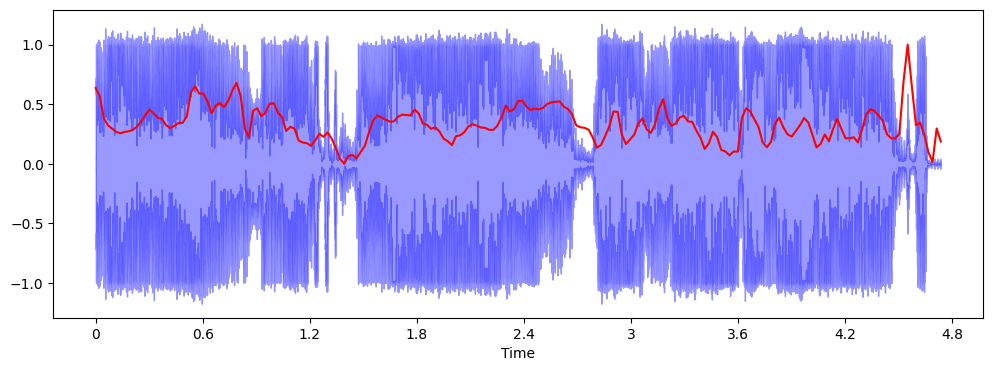

In [14]:
# spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

# spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sk.minmax_scale(y, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')
plt.plot(t, normalize(spectral_centroids), color='r')

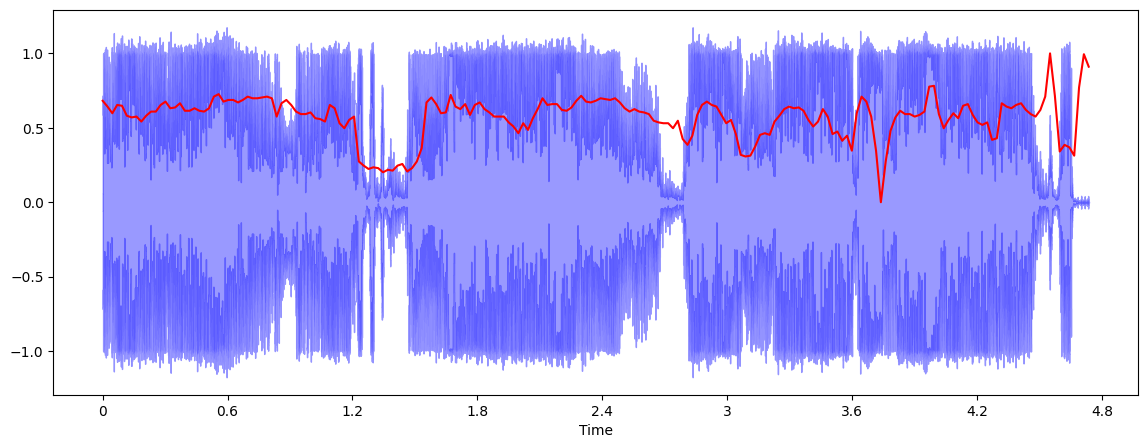

In [15]:
# generates a visual representation of an audio signal, overlaying the waveform in blue and plotting the normalized spectral rolloff in red. 
# This provides insights into the frequency content of the audio signal and highlight the regions where most of the spectral energy is concentrated. 
# The spectral rolloff information can be valuable in tasks such as music genre classification or audio content analysis.

# spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')

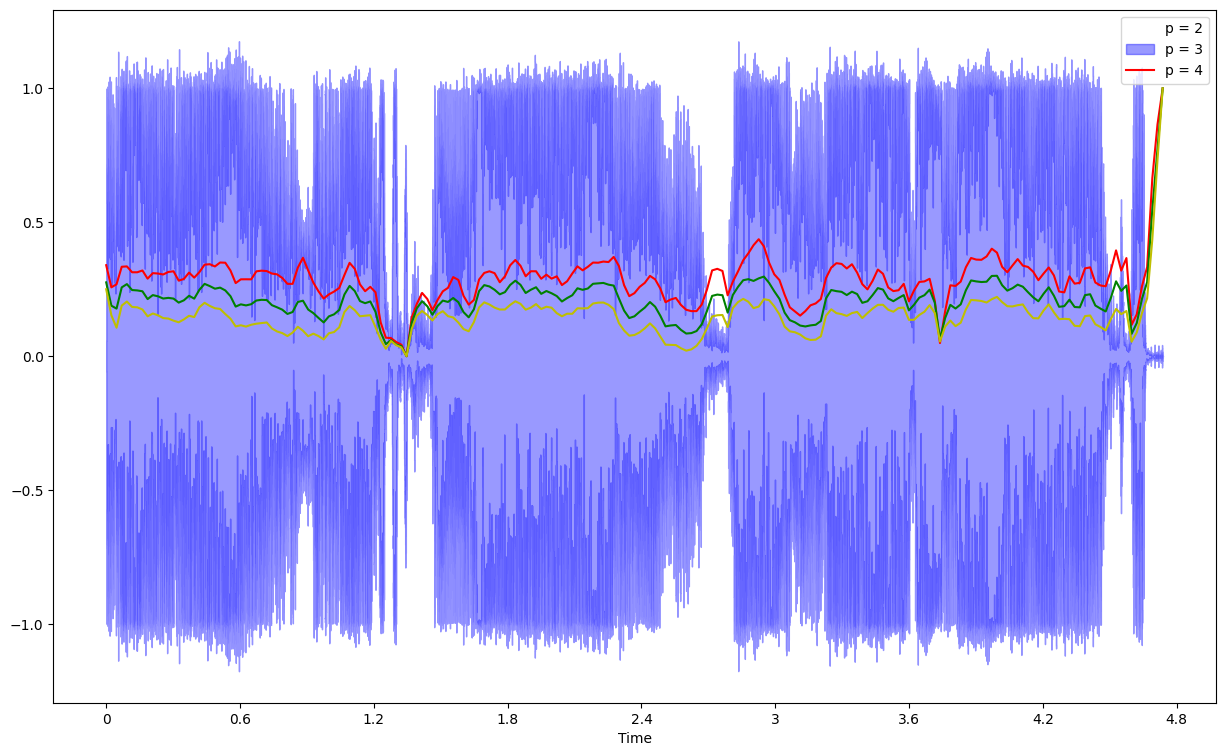

In [16]:
# visual representation of the spectral bandwidth of an audio signal for different power parameters. 
# The variations in spectral bandwidth for different 'p' values can give insights into the distribution of frequencies in the audio signal.

# spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
# spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
# spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 9))

librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')

plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

(20, 205)


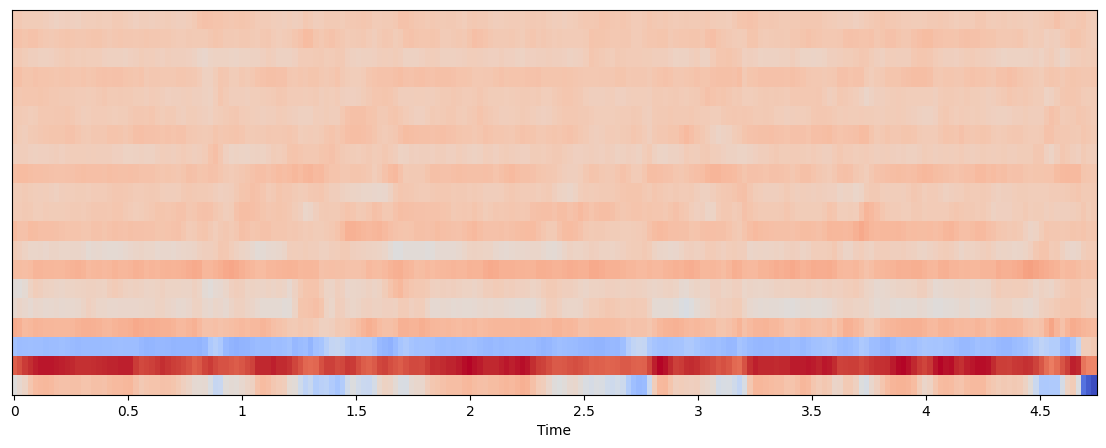

In [17]:
# computes the MFCCs of an audio signal and then displays them as a spectrogram. 
# MFCCs are commonly used in audio analysis, especially in tasks like speech and sound recognition, 
# because they capture important features of the audio signal that are relevant for distinguishing between different sounds. 
# The spectrogram visualization provides a time-frequency representation of the MFCCs, making it easier to interpret the audio features over time.

#mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [18]:
#load the csv file
data = pd.read_csv(csv_file)

In [19]:
# view the content of the csv file
data

chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0      0.485453  0.160919        2649.115488         2115.139341   
1      0.347577  0.155168        2975.189119         2135.969660   
2      0.193917  0.084454        2921.152881         2122.089341   
3      0.314331  0.102232        1869.010106         2233.281515   
4      0.678849  0.093094        1851.943334         1900.352129   
5      0.366121  0.143141        2850.067173         1802.508553   
6      0.269404  0.126713        2432.186133         1878.143563   
7      0.278710  0.193635        3062.226493         1934.479304   
8      0.442727  0.073361        2271.764821         2040.084159   
9      0.198853  0.326431        1918.150244         1893.969114   
10     0.462237  0.086054        2275.067134         2571.797979   
11     0.451147  0.057738        3707.615535         3075.602478   
12     0.345599  0.135058        1491.798816         1308.577818   
13     0.400341  0.095157        1787.884989         1116.607489   
14     0.480640  0.055721        4147.245926         3000.241677   
15     0.174297  0.246626        2921.363214         1818.188524   
16     0.181653  0.262509        1821.963151         1586.836885   
17     0.272894  0.202981        2572.518142         2046.387308   
18     0.190074  0.216411        2203.362975         1597.475932   
19     0.184828  0.366039        2241.219455         1957.259343   
20     0.371446  0.241720        1897.596430         2005.467082   
21     0.326406  0.208404        1013.256039          848.178970   
22     0.339642  0.173968        2307.067229         2053.408307   
23     0.299485  0.161547        1913.936907         1853.585731   
24     0.337024  0.189091        2100.002300         1456.863923   
25     0.278924  0.295130        1612.229287         1392.055459   
26     0.365741  0.141382        2173.989721         1476.685510   
27     0.513917  0.106021        3364.533928         2942.855318   
28     0.379367  0.202121        1954.784172         1666.908869   
29     0.388750  0.219863        1605.264508         2732.021561   
30     0.409432  0.211931        2575.593611         2142.971857   
31     0.367245  0.353131        1616.665861         1473.905476   
32     0.380758  0.139189        2017.520091         1959.096585   
33     0.565027  0.316891        1490.426984         1696.877015   
34     0.301638  0.259149        1753.776015         1872.359937   
35     0.340886  0.136237        2169.520077         1956.135514   
36     0.396149  0.212290        1760.069333         1913.979812   
37     0.420235  0.064600        2388.767807         1995.419612   
38     0.470184  0.154908        1681.025209         1726.908979   
39     0.434651  0.080768        1722.166900         1911.665006   
40     0.333136  0.094646        3513.741275         1800.199663   
41     0.491587  0.142925        1832.518986         1180.398599   
42     0.431445  0.148022        1473.297919         1174.186591   
43     0.436485  0.104236        2594.495584         2787.348297   
44     0.490323  0.118243        1770.214699         1343.564619   
45     0.352120  0.278181        1783.345266         1087.291438   
46     0.383771  0.258812        1740.218612         1087.495484   
47     0.365143  0.182148        2848.349705         1946.126173   
48     0.284916  0.193414        1767.079068          875.678979   
49     0.357191  0.515283        1882.107734         1071.989181   

    spectral_rolloff      mfcc_1      mfcc_2      mfcc_3      mfcc_4  \
0        5373.054158 -158.018250   72.576347  -43.574795   27.740923   
1        5769.742701 -170.053055   68.379654  -54.853977   59.130600   
2        5813.669868 -234.180328   63.944538  -59.822807   44.469276   
3        4820.406566 -281.333832   52.139484   -2.583665   32.563808   
4        3967.699726 -221.167175  114.396408  -40.181175   55.313354   
5        4819.972387 -184.390442   58.244816  -82.786911   45.838772   
6        4613.098675 -190.04093

In [20]:
# print the first row of the csv file to get an idea of the scale of values in each column
data.iloc[0].values

array([0.4854526, 0.16091909, 2649.115488158306, 2115.13934092665,
       5373.05415760387, -158.01824951171875, 72.57634735107422,
       -43.57479476928711, 27.740922927856445, -20.300621032714844,
       23.70965003967285, -10.49770450592041, 17.368925094604492,
       -10.956405639648438, 5.935412883758545, -1.6062651872634888,
       -6.504139423370361, 0.176180213689804, -6.966912746429443,
       10.434990882873535, -4.414867877960205, 9.387160301208496,
       -5.613084316253662, 3.124808549880981, -1.2300814390182495, 'cat'],
      dtype=object)

In [21]:
# print the column names of the dataframe
data.columns

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'mfcc_20', 'target'],
      dtype='object')

In [22]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         50 non-null     float64
 1   rmse                50 non-null     float64
 2   spectral_centroid   50 non-null     float64
 3   spectral_bandwidth  50 non-null     float64
 4   spectral_rolloff    50 non-null     float64
 5   mfcc_1              50 non-null     float64
 6   mfcc_2              50 non-null     float64
 7   mfcc_3              50 non-null     float64
 8   mfcc_4              50 non-null     float64
 9   mfcc_5              50 non-null     float64
 10  mfcc_6              50 non-null     float64
 11  mfcc_7              50 non-null     float64
 12  mfcc_8              50 non-null     float64
 13  mfcc_9              50 non-null     float64
 14  mfcc_10             50 non-null     float64
 15  mfcc_11             50 non-null     float64
 16  mfcc_12   

In [23]:
# get a statistical description of the data
data.describe()

chroma_stft       rmse  spectral_centroid  spectral_bandwidth  \
count    50.000000  50.000000          50.000000           50.000000   
mean      0.366654   0.181754        2205.888128         1831.332433   
std       0.103242   0.092182         637.102902          523.616248   
min       0.174297   0.055721        1013.256039          848.178970   
25%       0.304811   0.109077        1767.862976         1474.600485   
50%       0.365931   0.161233        1986.152132         1886.056338   
75%       0.433850   0.219000        2574.824744         2044.811521   
max       0.678849   0.515283        4147.245926         3075.602478   

       spectral_rolloff      mfcc_1      mfcc_2      mfcc_3      mfcc_4  \
count         50.000000   50.000000   50.000000   50.000000   50.000000   
mean        4113.967203 -170.259552   97.266845  -62.410594   16.557890   
std         1317.651647   59.205106   47.126517   42.688413   26.756344   
min         1639.459783 -313.242676   19.412172 -157.696411  -56.161076   
25%         3104.123383 -212.081287   61.390147  -85.454620   -0.267121   
50%         3910.234140 -173.728683   92.015392  -55.131273   16.062608   
75%         4832.724218 -115.957729  128.020664  -33.908493   33.800217   
max         7713.500977  -25.350327  216.064697   44.002594  101.466179   

          mfcc_5  ...    mfcc_11    mfcc_12    mfcc_13    mfcc_14    mfcc_15  \
count  50.000000  ...  50.000000  50.000000  50.000000  50.000000  50.000000   
mean  -20.833156  ...   0.076485   2.294150  -0.997123  -1.478424   2.927375   
std    19.501774  ...  13.978392   8.667696  11.206428   6.240925   8.634649   
min   -60.286087  ... -25.330578 -25.728020 -26.862112 -16.938194 -16.551319   
25%   -34.555806  ...  -7.103133  -2.495236  -9.418979  -6.288436  -4.485476   
50%   -19.797769  ...  -1.797685   1.573786   0.169964  -0.733138   1.736180   
75%    -6.077056  ...   3.684310   8.468965   7.500288   2.971531  10.662503   
max    19.727247  ...  42.704395  23.378801  16.814550  15.413602  21.429342   

         mfcc_16    mfcc_17    mfcc_18    mfcc_19    mfcc_20  
count  50.000000  50.000000  50.000000  50.000000  50.000000  
mean   -3.711309   5.300862  -3.676404   3.582145   0.709907  
std     7.293947   7.970135   7.164172   7.779762   6.662106  
min   -19.142773 -12.260499 -18.008341 -11.812617 -10.105331  
25%    -9.132063   0.750347  -8.737601  -2.638114  -3.627660  
50%    -4.315608   6.427079  -4.302146   3.619354   0.090627  
75%    -0.039067   9.096634   1.226066   8.784990   4.212911  
max    13.959196  23.928432  11.007443  23.533014  17.858889  

[8 rows x 25 columns]

In [24]:
# define the target variable
target_column_name = 'target'

# Extract the target column
target_column = data[target_column_name]

# Drop the target column for scaling
df_features = data.drop(columns=[target_column_name])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
df = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Add the target column back to the scaled DataFrame
df[target_column_name] = target_column


In [25]:
# value counts of the target variable
target_column.value_counts()

target
cat        10
chicken    10
cow        10
dog        10
duck       10
Name: count, dtype: int64

In [26]:
# print the first 5 rows of the scaled dataframe
df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0     0.616696  0.228910           0.521973            0.568801   
1     0.343433  0.216395           0.626018            0.578153   
2     0.038886  0.062523           0.608776            0.571921   
3     0.277541  0.101209           0.273056            0.621841   
4     1.000000  0.081324           0.267610            0.472372   

   spectral_rolloff    mfcc_1    mfcc_2    mfcc_3    mfcc_4    mfcc_5  ...  \
0          0.614680  0.539175  0.270346  0.565802  0.532281  0.499735  ...   
1          0.679989  0.497372  0.249005  0.509881  0.731420  0.312789  ...   
2          0.687221  0.274625  0.226452  0.485246  0.638407  0.405696  ...   
3          0.523695  0.110836  0.166422  0.769031  0.562878  0.597115  ...   
4          0.383310  0.319826  0.483005  0.582627  0.707203  0.512304  ...   

    mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18  \
0  0.391471  0.619056  0.308214  0.710528  0.444925  0.598185  0.427190   
1  0.404825  0.911057  0.528183  0.840742  0.145169  0.791803  0.308867   
2  0.658800  0.940713  0.178445  0.717376  0.166683  0.487874  0.248183   
3  0.805701  0.963437  0.619751  0.754126  0.507033  0.593928  0.658671   
4  0.543405  0.844419  0.337889  0.708387  0.399707  0.634835  0.580270   

    mfcc_19   mfcc_20  target  
0  0.422610  0.317379     cat  
1  0.431542  0.234959     cat  
2  0.713742  0.152565     cat  
3  0.616998  0.661799     cat  
4  0.567328  0.377223     cat  

[5 rows x 26 columns]

In [27]:
# print the first 5 rows of the original dataframe for comparison
data.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0     0.485453  0.160919        2649.115488         2115.139341   
1     0.347577  0.155168        2975.189119         2135.969660   
2     0.193917  0.084454        2921.152881         2122.089341   
3     0.314331  0.102232        1869.010106         2233.281515   
4     0.678849  0.093094        1851.943334         1900.352129   

   spectral_rolloff      mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0       5373.054158 -158.018250   72.576347 -43.574795  27.740923 -20.300621   
1       5769.742701 -170.053055   68.379654 -54.853977  59.130600 -35.258793   
2       5813.669868 -234.180328   63.944538 -59.822807  44.469276 -27.824986   
3       4820.406566 -281.333832   52.139484  -2.583665  32.563808 -12.508902   
4       3967.699726 -221.167175  114.396408 -40.181175  55.313354 -19.294916   

   ...    mfcc_12    mfcc_13    mfcc_14    mfcc_15    mfcc_16    mfcc_17  \
0  ...  -6.504139   0.176180  -6.966913  10.434991  -4.414868   9.387160   
1  ...  -5.848365  12.929809   0.149480  15.380602 -14.337380  16.394005   
2  ...   6.623551  14.225113 -11.165178  10.695107 -13.625226   5.395151   
3  ...  13.837408  15.217585   3.111854  12.090899  -2.358988   9.233122   
4  ...   0.956886  10.019274  -6.006890  10.353674  -5.911700  10.713505   

     mfcc_18    mfcc_19   mfcc_20  target  
0  -5.613084   3.124809 -1.230081     cat  
1  -9.046316   3.440518 -3.534879     cat  
2 -10.807114  13.415056 -5.838984     cat  
3   1.103505   9.995560  8.401368     cat  
4  -1.171345   8.239932  0.443402     cat  

[5 rows x 26 columns]

In [28]:
# Data Splitting without "stratify" parameter in train_test_split

# Defining features and target variable
X = df.drop(['target'], axis = 1)
y = df['target']

# Performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Displaying the shapes of the train and test sets
print('X Training set shape:', X_train.shape)
print('y Training set shape:', y_train.shape)
print('X Test set shape:', X_test.shape)
print('y Test set shape:', y_test.shape)

X Training set shape: (40, 25)
y Training set shape: (40,)
X Test set shape: (10, 25)
y Test set shape: (10,)


In [29]:
# print the value count of target variable used for training
y_train.value_counts()

target
cat        10
duck        8
cow         8
chicken     7
dog         7
Name: count, dtype: int64

In [30]:
# Data Splitting with "stratify" parameter in train_test_split

# Defining features and target variable
X = df.drop(['target'], axis = 1)
y = df['target']

# Performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Displaying the shapes of the train and test sets
print('X Training set shape:', X_train.shape)
print('y Training set shape:', y_train.shape)
print('X Test set shape:', X_test.shape)
print('y Test set shape:', y_test.shape)

X Training set shape: (40, 25)
y Training set shape: (40,)
X Test set shape: (10, 25)
y Test set shape: (10,)


In [31]:
# print the value count of target variable used for training
y_train.value_counts()

target
cat        8
cow        8
dog        8
chicken    8
duck       8
Name: count, dtype: int64

In [32]:
# defines a Python class named "Model" that inherits from the "Enum" class. 
# class "model" represent the set of machine learning model names used to classify the audio file as enumeration constants.
# By using this Model enumeration, you can refer to these machine learning model names in a more structured and readable way in your code. 
# For example, instead of using strings directly, you can use Model.LOGISTIC_REGRESSION to represent the "LogisticRegression" classifier. 
# This helps avoid typos and improves code maintainability.

class Model(Enum):
    LOGISTIC_REGRESSION = "LogisticRegression"
    RIDGE = "RidgeClassifier"
    K_NEIGHBORS = "KNeighborsClassifier"
    SVC = "SVC"
    DECISION_TREE = "DecisionTreeClassifier"
    RANDOM_FOREST = "RandomForestClassifier"
    ADA_BOOST = "AdaBoostClassifier"

In [33]:
# define a dataframe to store the values of train-accuracy, test-accuracy, precision, recall, f1-score of respective algorithms
model_results_df = pd.DataFrame(columns=[ 'Classifier', 'Train Accuracy Score', 'Test Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])

# define a funciton to model building
def train_test_report_for(model_type, model, X_train, X_test, y_train, y_test, index, message, best_score, save_model=True):
    global model_results_df
    """
    This function takes a model, fits it on the training data, makes predictions on the test data,
    and then prints the classification report and confusion matrix for the model.
    
    Parameters:
       model_type (Model): The type of model being used.
       model (sklearn model): The model to be used.
       X_train (DataFrame): The training data.
       X_test (DataFrame): The test data.
       y_train (Series): The training labels.
       y_test (Series): The test labels.
       index (int): The index of the row in the results DataFrame where the results are to be stored.
       save_model (bool): Whether to save the model or not.
    """
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # compute the accuracy score for test and train
    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    # calculate the precision score
    pred_precision_score = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # calculate the recall score
    pred_recall_score = recall_score(y_test, y_pred, average='weighted')
    
    # calculate the F1-Score
    pred_f1_score = f1_score(y_test, y_pred, average='weighted')
    
    # Print the classification report
    print(f'Classification report for {model_type}:')
    print(classification_report(y_test, y_pred, zero_division=1))

    # Model - Confusion matrix
    model_confusion_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(model_confusion_matrix, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Store the results in the DataFrame
    model_results_df.loc[index] = [model_type.value, train_accuracy_score, test_accuracy_score, pred_precision_score, pred_recall_score, pred_f1_score]

    # Save the model if specified
    if save_model and pred_f1_score > best_score:
        # Update the best score
        best_score = pred_f1_score
        filename = 'finalised_model.sav'
        pickle.dump(model, open(filename, 'wb'))

    return best_score

Classification report for Model.LOGISTIC_REGRESSION:
              precision    recall  f1-score   support

         cat       0.50      0.50      0.50         2
     chicken       0.50      0.50      0.50         2
         cow       1.00      1.00      1.00         2
         dog       1.00      0.50      0.67         2
        duck       0.67      1.00      0.80         2

    accuracy                           0.70        10
   macro avg       0.73      0.70      0.69        10
weighted avg       0.73      0.70      0.69        10



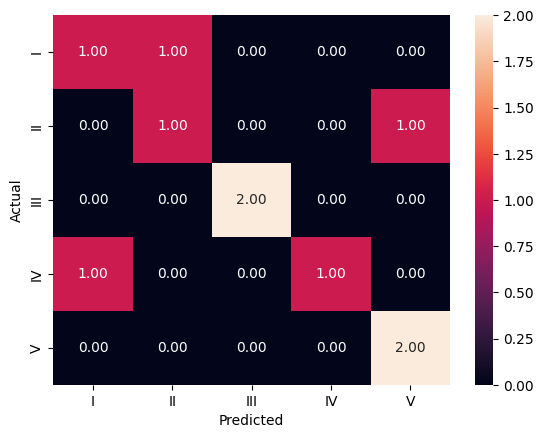

best_f1_score yet is 0.6933333333333334


Classifier  Train Accuracy Score  Test Accuracy Score  \
1  LogisticRegression                 0.925                  0.7   

   Precision Score  Recall Score  F1-Score  
1         0.733333           0.7  0.693333

In [34]:
# Implementing the logistic regression classifier to the data

# Instantiate the Logistic Regression model with increased number of iterations
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

# setting best_f1_score = -1 is a common practice in optimization scenarios where a lower initial value ensures that any subsequent valid value encountered will be considered an improvement.
# By initializing best_f1_score to -1, the code ensures that the first calculated F1-score will be considered as an improvement, regardless of its actual value. 
# As the code progresses and evaluates different models, the variable best_f1_score is updated only if a newly calculated F1-score is higher than the current best. 
# This way, the variable starts with a low value, and any valid F1-score encountered during the model evaluation will replace it as the new best F1-score.
best_f1_score = -1

best_f1_score = train_test_report_for(Model.LOGISTIC_REGRESSION, model_logreg, X_train, X_test, y_train, y_test, 1, "Logistic Regression X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.SVC:
              precision    recall  f1-score   support

         cat       0.67      1.00      0.80         2
     chicken       1.00      0.50      0.67         2
         cow       1.00      0.50      0.67         2
         dog       1.00      0.50      0.67         2
        duck       0.50      1.00      0.67         2

    accuracy                           0.70        10
   macro avg       0.83      0.70      0.69        10
weighted avg       0.83      0.70      0.69        10



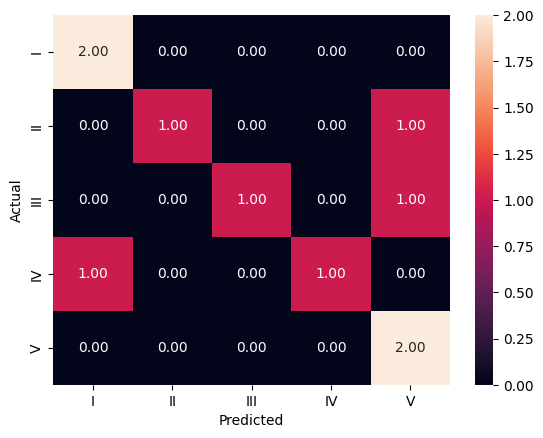

best_f1_score yet is 0.6933333333333332


Classifier  Train Accuracy Score  Test Accuracy Score  \
1  LogisticRegression                 0.925                  0.7   
2                 SVC                 0.925                  0.7   

   Precision Score  Recall Score  F1-Score  
1         0.733333           0.7  0.693333  
2         0.833333           0.7  0.693333

In [35]:
# Implementing the Support Vector Classifier to the data

# Instantiate the SVC model with increased number of iterations
model_logsvc = SVC(kernel = 'rbf', probability=True, random_state = 42)

best_f1_score = -1

best_f1_score2 = train_test_report_for(Model.SVC, model_logsvc, X_train, X_test, y_train, y_test, 2, "SVC X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score2}")
model_results_df

Classification report for Model.ADA_BOOST:
              precision    recall  f1-score   support

         cat       0.50      0.50      0.50         2
     chicken       0.50      0.50      0.50         2
         cow       0.50      0.50      0.50         2
         dog       1.00      0.00      0.00         2
        duck       0.25      0.50      0.33         2

    accuracy                           0.40        10
   macro avg       0.55      0.40      0.37        10
weighted avg       0.55      0.40      0.37        10



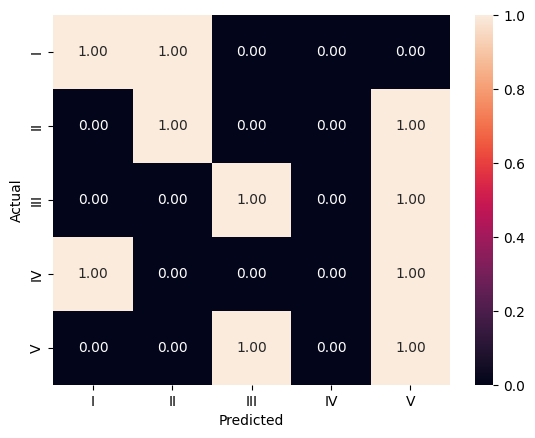

best_f1_score yet is 0.36666666666666664


Classifier  Train Accuracy Score  Test Accuracy Score  \
1  LogisticRegression                 0.925                  0.7   
2                 SVC                 0.925                  0.7   
3  AdaBoostClassifier                 0.950                  0.4   

   Precision Score  Recall Score  F1-Score  
1         0.733333           0.7  0.693333  
2         0.833333           0.7  0.693333  
3         0.350000           0.4  0.366667

In [36]:
# Implementing the Adaboost classifier to the data

# Instantiate the Adaboost model with increased number of iterations
model_logada = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=42)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.ADA_BOOST, model_logada, X_train, X_test, y_train, y_test, 3, "AdaBoost X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.DECISION_TREE:
              precision    recall  f1-score   support

         cat       0.67      1.00      0.80         2
     chicken       0.67      1.00      0.80         2
         cow       0.50      0.50      0.50         2
         dog       1.00      0.00      0.00         2
        duck       0.00      0.00      1.00         2

    accuracy                           0.50        10
   macro avg       0.57      0.50      0.62        10
weighted avg       0.57      0.50      0.62        10



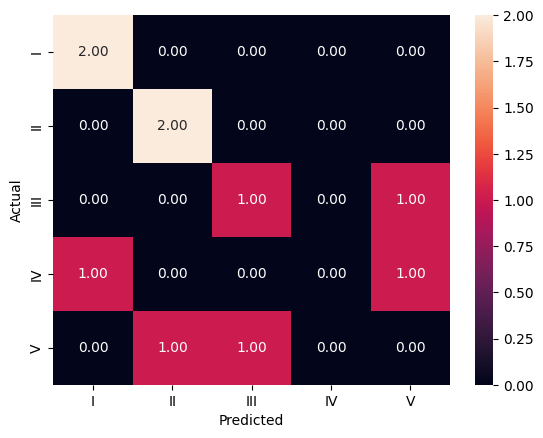

best_f1_score yet is 0.42000000000000004


Classifier  Train Accuracy Score  Test Accuracy Score  \
1      LogisticRegression                 0.925                  0.7   
2                     SVC                 0.925                  0.7   
3      AdaBoostClassifier                 0.950                  0.4   
4  DecisionTreeClassifier                 1.000                  0.5   

   Precision Score  Recall Score  F1-Score  
1         0.733333           0.7  0.693333  
2         0.833333           0.7  0.693333  
3         0.350000           0.4  0.366667  
4         0.366667           0.5  0.420000

In [37]:
# Implementing the Decision Tree Classifier to the data

# Instantiate the Decision Tree model with increased number of iterations
model_logdectree = DecisionTreeClassifier(random_state = 42)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.DECISION_TREE, model_logdectree, X_train, X_test, y_train, y_test, 4, "Decision Tree X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.RANDOM_FOREST:
              precision    recall  f1-score   support

         cat       0.50      1.00      0.67         2
     chicken       0.50      0.50      0.50         2
         cow       0.67      1.00      0.80         2
         dog       1.00      0.00      0.00         2
        duck       1.00      0.50      0.67         2

    accuracy                           0.60        10
   macro avg       0.73      0.60      0.53        10
weighted avg       0.73      0.60      0.53        10



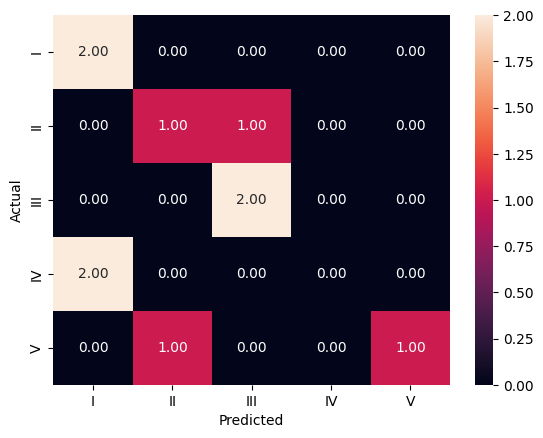

best_f1_score yet is 0.5266666666666666


Classifier  Train Accuracy Score  Test Accuracy Score  \
1      LogisticRegression                 0.925                  0.7   
2                     SVC                 0.925                  0.7   
3      AdaBoostClassifier                 0.950                  0.4   
4  DecisionTreeClassifier                 1.000                  0.5   
5  RandomForestClassifier                 1.000                  0.6   

   Precision Score  Recall Score  F1-Score  
1         0.733333           0.7  0.693333  
2         0.833333           0.7  0.693333  
3         0.350000           0.4  0.366667  
4         0.366667           0.5  0.420000  
5         0.533333           0.6  0.526667

In [38]:
# Implementing the Random Forest classifier to the data

# Instantiate the RandomForest Classifier model with increased number of iterations
model_logRF = RandomForestClassifier(n_estimators=10, random_state=42)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.RANDOM_FOREST, model_logRF, X_train, X_test, y_train, y_test, 5, " RandomForest X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.K_NEIGHBORS:
              precision    recall  f1-score   support

         cat       0.50      1.00      0.67         2
     chicken       1.00      0.50      0.67         2
         cow       1.00      0.50      0.67         2
         dog       1.00      0.00      0.00         2
        duck       0.50      1.00      0.67         2

    accuracy                           0.60        10
   macro avg       0.80      0.60      0.53        10
weighted avg       0.80      0.60      0.53        10



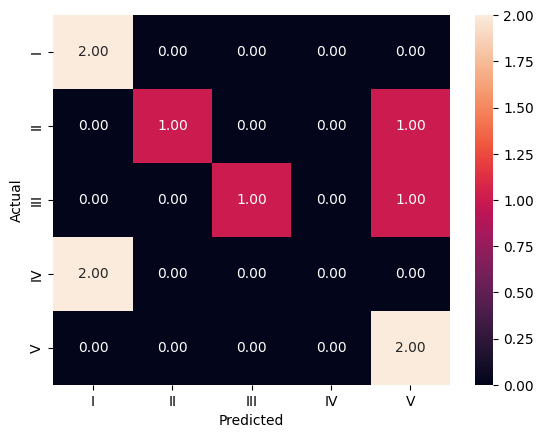

best_f1_score yet is 0.5333333333333333


Classifier  Train Accuracy Score  Test Accuracy Score  \
1      LogisticRegression                 0.925                  0.7   
2                     SVC                 0.925                  0.7   
3      AdaBoostClassifier                 0.950                  0.4   
4  DecisionTreeClassifier                 1.000                  0.5   
5  RandomForestClassifier                 1.000                  0.6   
6    KNeighborsClassifier                 0.775                  0.6   

   Precision Score  Recall Score  F1-Score  
1         0.733333           0.7  0.693333  
2         0.833333           0.7  0.693333  
3         0.350000           0.4  0.366667  
4         0.366667           0.5  0.420000  
5         0.533333           0.6  0.526667  
6         0.600000           0.6  0.533333

In [39]:
# Implementing the KNN classifier to the data

# Instantiate the KNeighborsClassifier model with increased number of iterations
model_logKNN = KNeighborsClassifier(n_neighbors = 3)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.K_NEIGHBORS, model_logKNN, X_train, X_test, y_train, y_test, 6, " KNN X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

Classification report for Model.RIDGE:
              precision    recall  f1-score   support

         cat       0.50      0.50      0.50         2
     chicken       0.50      0.50      0.50         2
         cow       0.67      1.00      0.80         2
         dog       0.50      0.50      0.50         2
        duck       1.00      0.50      0.67         2

    accuracy                           0.60        10
   macro avg       0.63      0.60      0.59        10
weighted avg       0.63      0.60      0.59        10



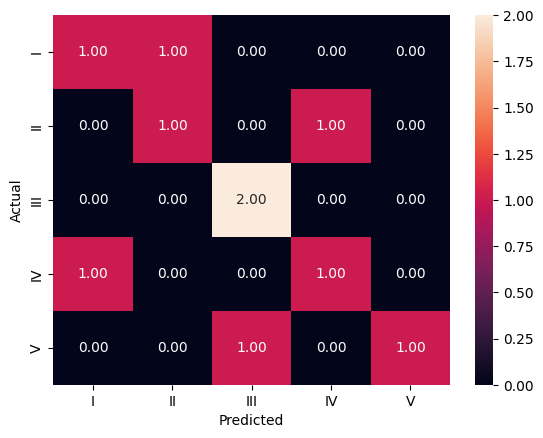

best_f1_score yet is 0.5933333333333333


Classifier  Train Accuracy Score  Test Accuracy Score  \
1      LogisticRegression                 0.925                  0.7   
2                     SVC                 0.925                  0.7   
3      AdaBoostClassifier                 0.950                  0.4   
4  DecisionTreeClassifier                 1.000                  0.5   
5  RandomForestClassifier                 1.000                  0.6   
6    KNeighborsClassifier                 0.775                  0.6   
7         RidgeClassifier                 0.975                  0.6   

   Precision Score  Recall Score  F1-Score  
1         0.733333           0.7  0.693333  
2         0.833333           0.7  0.693333  
3         0.350000           0.4  0.366667  
4         0.366667           0.5  0.420000  
5         0.533333           0.6  0.526667  
6         0.600000           0.6  0.533333  
7         0.633333           0.6  0.593333

In [40]:
# Implementing the Ridge classifier to the data

# Instantiate the RidgeClassifier model with increased number of iterations
model_logridge = RidgeClassifier(random_state = 42)

best_f1_score = -1

best_f1_score = train_test_report_for(Model.RIDGE, model_logridge, X_train, X_test, y_train, y_test, 7, "Ridge X_train, y_train, X_test, y_test", best_f1_score)
print(f"best_f1_score yet is {best_f1_score}")
model_results_df

In [41]:
# function to predict on a new given audio
def predict(path):
    # Define the classifier used
    classifier = ["LogisticRegression","RidgeClassifier","KNeighborsClassifier","SVC","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier"]

    # Load the audio file
    y, sr = librosa.load(path) 

    # Compute the important features of the audio file
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) 
    rmse = librosa.feature.rms(y=y) 
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)  
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    #compute the mean values for the extracted features and store is as a list
    features = [chroma_stft.mean(), rmse.mean(), spectral_centroid.mean(),
                spectral_bandwidth.mean(), spectral_rolloff.mean()] + mfccs.mean(axis=1).tolist()
    
    # scale the features after converting it to an array
    # a = np.array(features).reshape(1, -1)
    a = scaler.transform(np.array(features).reshape(1, -1))

    #define a dataframe to store the prediction and actual output
    model_pred_df = pd.DataFrame(columns=['Classifier', 'Actual','Prediction'])

    # Regular expression pattern to extract "x.wav" from the audio path
    pattern = r'\\([^\\]+\.wav)$'

    # Extract "x.wav" from each string
    result = [re.search(pattern, path).group(1) if re.search(pattern, path) else None for path in path.split(';')]

    # Remove the '-test.wav' part and save the result
    actual = [name.replace('-test.wav', '') for name in result] # Assuming the file name will be animal-test.wav
    
    for i in range(len(classifier)):
        if i==0: 
            alg = classifier[i]
            c = model_logreg.predict(a)
        if i==1:
            alg = classifier[i]
            c = model_logridge.predict(a)
        if i==2:
            alg = classifier[i]
            c = model_logKNN.predict(a)
        if i==3:
            alg = classifier[i]
            c = model_logsvc.predict(a)
        if i==4:
            alg = classifier[i]
            c = model_logdectree.predict(a)
        if i==5:
            alg = classifier[i]
            c = model_logRF.predict(a)
        if i==6:
            alg = classifier[i]
            c = model_logada.predict(a)
             
        model_pred_df.loc[i] = [alg, actual, c]
        
    return model_pred_df

In [42]:
#file path of the testing audio
testfile_path="C:\\Users\\AKHIL JX\\Music\\Akhil ML Project\\test\\chicken-test.wav"

#To play the test audio
ipd.Audio(testfile_path)

In [43]:
# perform prediction on the audio file
a = predict(testfile_path)
a

C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have val

Classifier     Actual Prediction
0      LogisticRegression  [chicken]  [chicken]
1         RidgeClassifier  [chicken]  [chicken]
2    KNeighborsClassifier  [chicken]      [cat]
3                     SVC  [chicken]  [chicken]
4  DecisionTreeClassifier  [chicken]      [cat]
5  RandomForestClassifier  [chicken]      [cat]
6      AdaBoostClassifier  [chicken]  [chicken]

In [44]:
model_results_df

Classifier  Train Accuracy Score  Test Accuracy Score  \
1      LogisticRegression                 0.925                  0.7   
2                     SVC                 0.925                  0.7   
3      AdaBoostClassifier                 0.950                  0.4   
4  DecisionTreeClassifier                 1.000                  0.5   
5  RandomForestClassifier                 1.000                  0.6   
6    KNeighborsClassifier                 0.775                  0.6   
7         RidgeClassifier                 0.975                  0.6   

   Precision Score  Recall Score  F1-Score  
1         0.733333           0.7  0.693333  
2         0.833333           0.7  0.693333  
3         0.350000           0.4  0.366667  
4         0.366667           0.5  0.420000  
5         0.533333           0.6  0.526667  
6         0.600000           0.6  0.533333  
7         0.633333           0.6  0.593333

In [45]:
# Merge the two dataframes based on the "Classifier" column to get complete description of the output of each classifier
output = pd.merge(model_results_df,a, on='Classifier')

In [46]:
output

Classifier  Train Accuracy Score  Test Accuracy Score  \
0      LogisticRegression                 0.925                  0.7   
1                     SVC                 0.925                  0.7   
2      AdaBoostClassifier                 0.950                  0.4   
3  DecisionTreeClassifier                 1.000                  0.5   
4  RandomForestClassifier                 1.000                  0.6   
5    KNeighborsClassifier                 0.775                  0.6   
6         RidgeClassifier                 0.975                  0.6   

   Precision Score  Recall Score  F1-Score     Actual Prediction  
0         0.733333           0.7  0.693333  [chicken]  [chicken]  
1         0.833333           0.7  0.693333  [chicken]  [chicken]  
2         0.350000           0.4  0.366667  [chicken]  [chicken]  
3         0.366667           0.5  0.420000  [chicken]      [cat]  
4         0.533333           0.6  0.526667  [chicken]      [cat]  
5         0.600000           0.6  0.533333  [chicken]      [cat]  
6         0.633333           0.6  0.593333  [chicken]  [chicken]